In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('data (1).csv')

### EXPLORATORY DATA ANALYSIS

Sebelum melakukan hal seperti seleksi fitur, ekstraksi fitur, dan klasifikasi, pertama-tama kita mulai dengan analisis data dasar. Mari kita lihat fitur-fitur dari data tersebut.

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Unnamed: 32    569
dtype: int64


- Terdapat kolom id yang tidak dapat digunakan untuk klasifikasi.
- Fitur `Unnamed: 32` mempunyai missing values banyak sehingga tidak kita butuhkan
- `diagnosis` adalah label dari data ini

In [ ]:
# feature names as a list
col = data.columns       # .columns gives columns names in data
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
# Define labels and features
y = data['diagnosis']
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


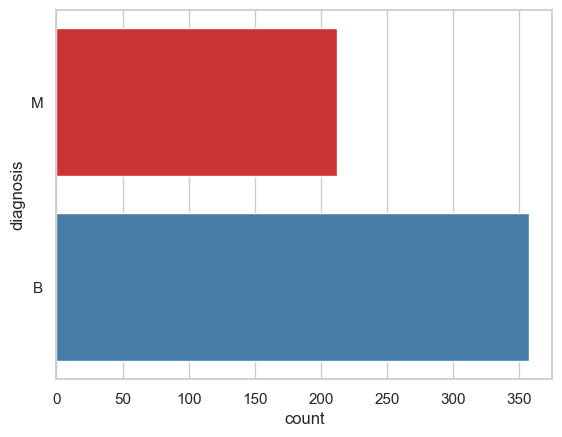

Number of Benign:  357
Number of Malignant :  212


In [ ]:
sns.countplot(y, label="Count", palette="Set1")
B, M = y.value_counts()
plt.show()
print('Number of Benign: ', B)
print('Number of Malignant : ', M)

**Interpretasi:**
- Grafik ini menunjukkan jumlah sampel yang termasuk dalam kategori kanker jinak (Benign) dan ganas (Malignant).
- Dari visualisasi ini, terlihat bahwa jumlah sampel dengan diagnosis jinak lebih banyak daripada yang ganas.
- Penting untuk diketahui karena distribusi yang tidak seimbang dapat mempengaruhi model prediksi.

Selanjutnya kita perlu mengecek fitur untuk menentukan penanganan

In [ ]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Melihat beragamnya nilai dari tiap fitur maka diperlukan standarisasi atau normalisasi sebelum visualisasi dan pemilihan fitur

In [ ]:
# normalize the data
data_n_2 = (X - X.mean()) / (X.std())
data = pd.concat([y, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))

data.head()

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


<Figure size 1000x1000 with 0 Axes>

### VISUALISASI

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

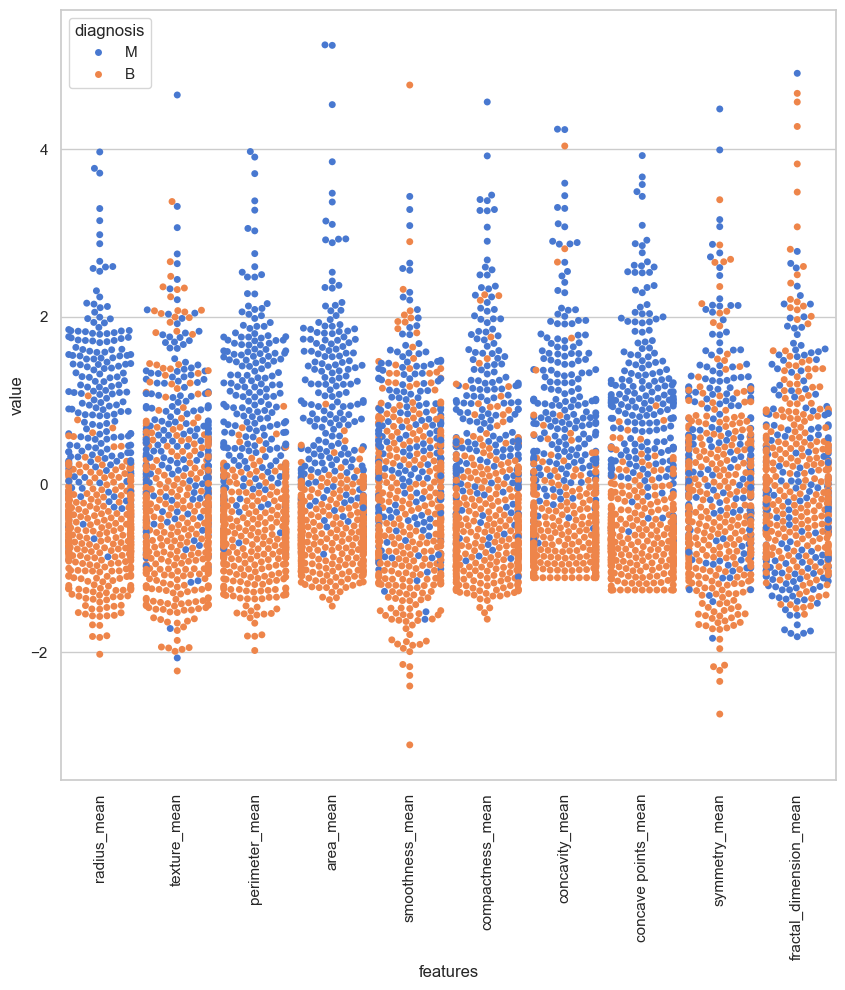

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

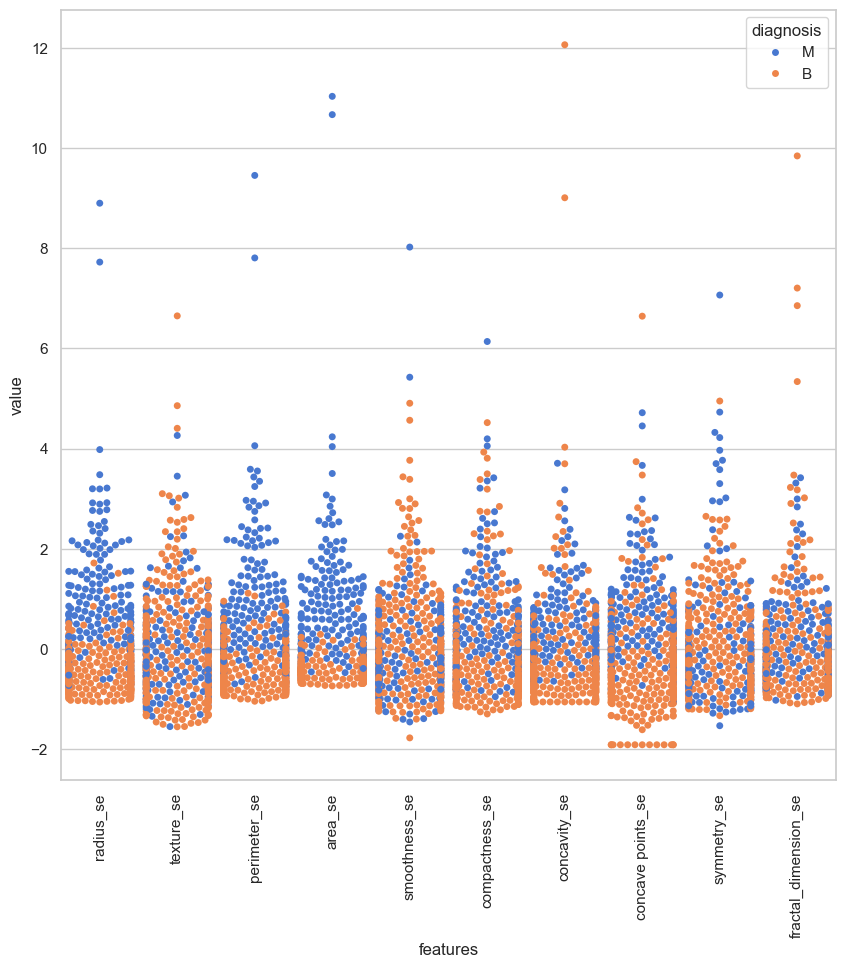

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  18.85894513130188  s


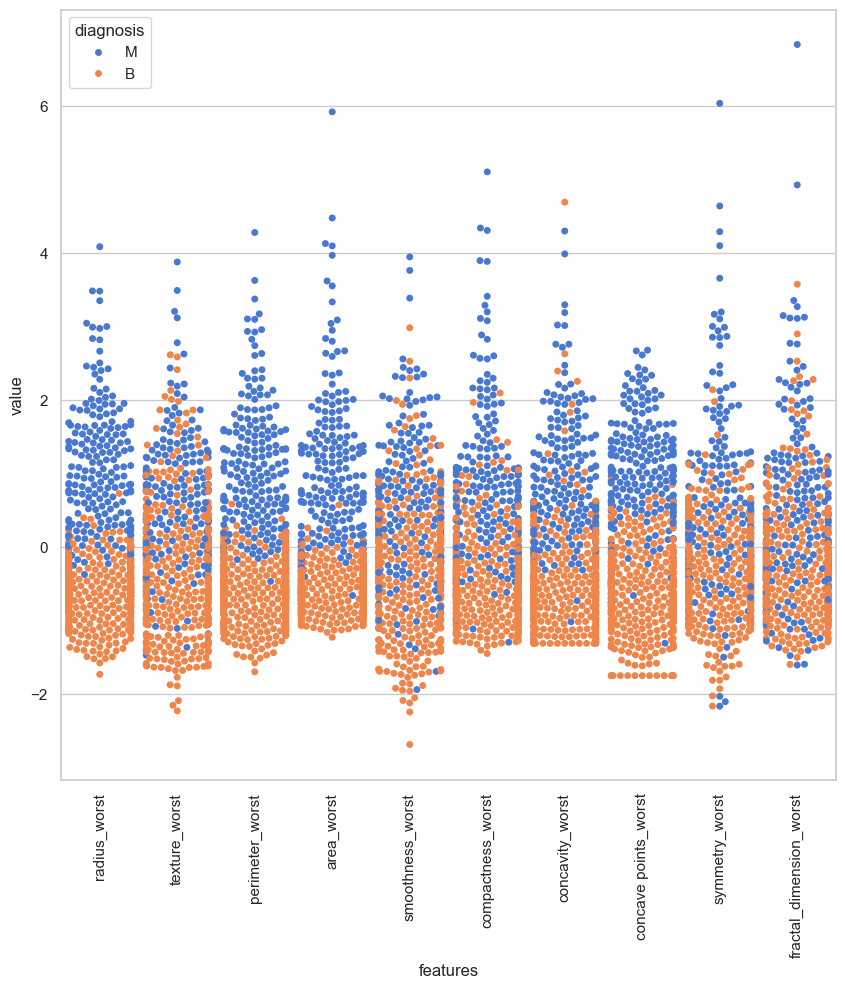

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

Plot ini terlihat sangat baik dan varians dapat terlihat dengan lebih jelas. Dari ketiga plot ini, fitur mana yang terlihat lebih jelas dalam hal klasifikasi? Menurut kami, area_worst pada plot swarm terakhir menunjukkan pemisahan antara jinak dan ganas, meskipun tidak sepenuhnya tetapi sebagian besar. Sementara itu, smoothness_se pada plot swarm kedua menunjukkan bahwa jinak dan ganas tercampur, sehingga sulit untuk melakukan klasifikasi menggunakan fitur ini.

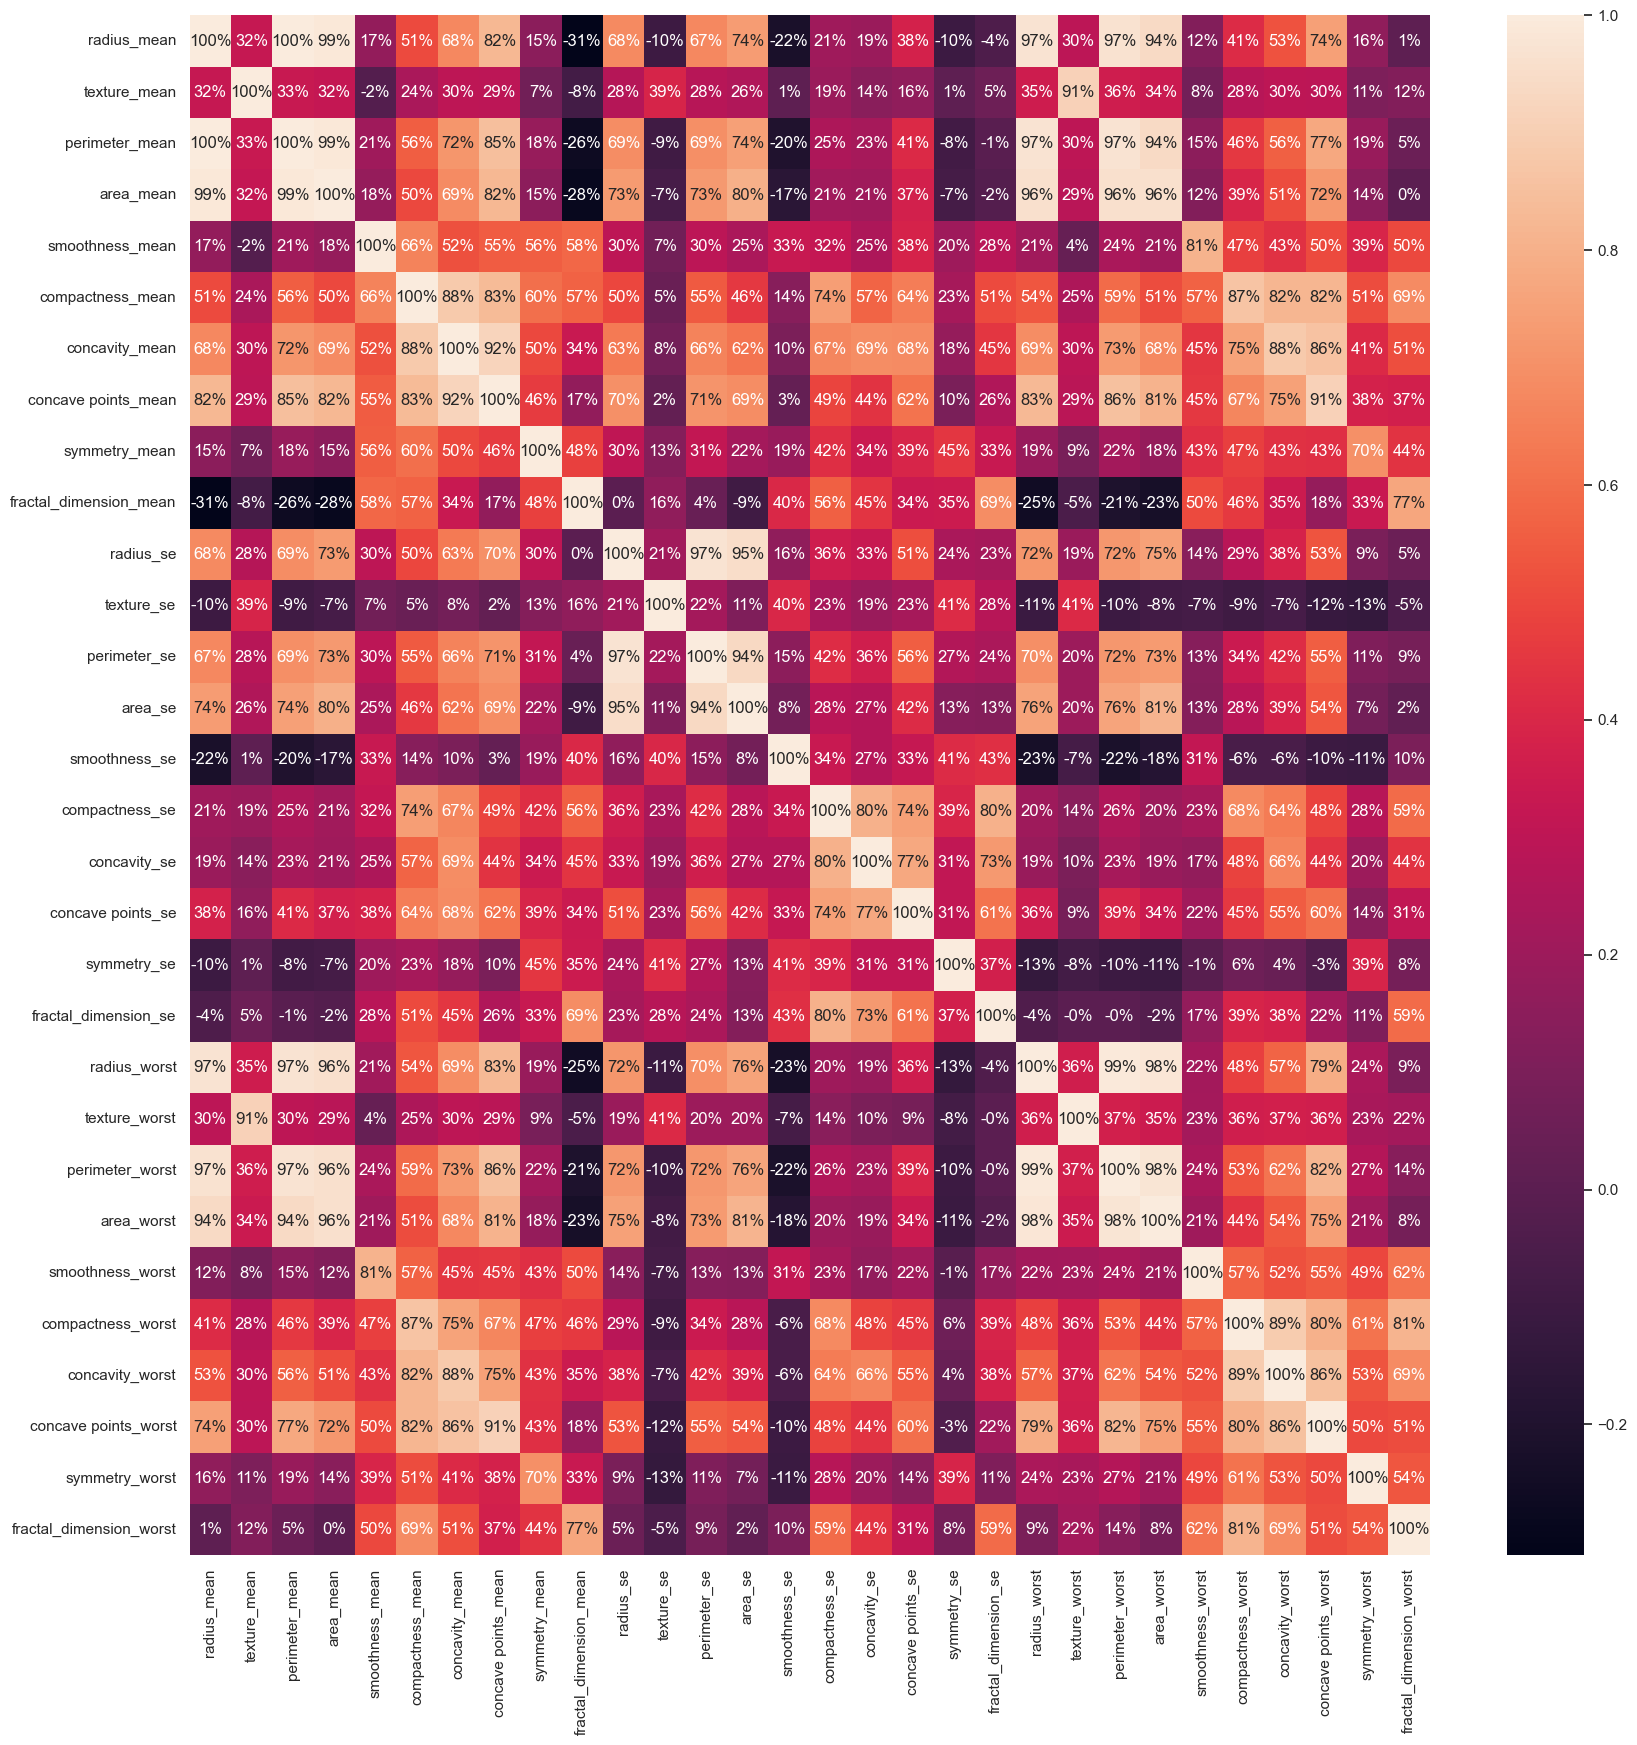

In [ ]:
# Visualize correlations between numerical features
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, fmt='.0%')
plt.show()

## PEMILIHAN FITUR DAN KLASIFIKASI RANDOM FOREST

### 1. Feature selection with correlation and random forest classification


Pada gambar heatmap, terlihat bahwa `radius_mean`, `perimeter_mean`, dan `area_mean` saling berkorelasi. Oleh karena itu, kami memilih untuk hanya menggunakan `area_mean`. Pemilihan `area_mean` sebagai fitur bukan karena ada jawaban yang pasti, tetapi berdasarkan pengamatan saya pada plot swarm, `area_mean` tampak lebih jelas. Namun, untuk memisahkan fitur-fitur berkorelasi lainnya, kita perlu melakukan pengujian lebih lanjut. Selanjutnya, mari kita identifikasi fitur-fitur berkorelasi lainnya dan uji akurasinya menggunakan random forest classifier.

`Compactness_mean`, `concavity_mean`, dan `concave points_mean` juga saling berkorelasi. Maka, kami memilih untuk hanya menggunakan `concavity_mean`. Selain itu, `radius_se`, `perimeter_se`, dan `area_se` berkorelasi, sehingga saya hanya menggunakan `area_se`. Demikian pula, `radius_worst`, `perimeter_worst`, dan `area_worst` berkorelasi, sehingga kami hanya menggunakan `area_worst`. `Compactness_worst`, `concavity_worst`, dan `concave points_worst` juga berkorelasi, sehingga saya hanya menggunakan `concavity_worst`. `Compactness_se`, `concavity_se`, dan `concave points_se` berkorelasi, sehingga saya memilih `concavity_se`. `texture_mean` dan `texture_worst` berkorelasi, sehingga kami menggunakan `texture_mean`. Akhirnya, `area_worst` dan `area_mean` juga berkorelasi, sehingga kami memilih `area_mean`.

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = X.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<Axes: >

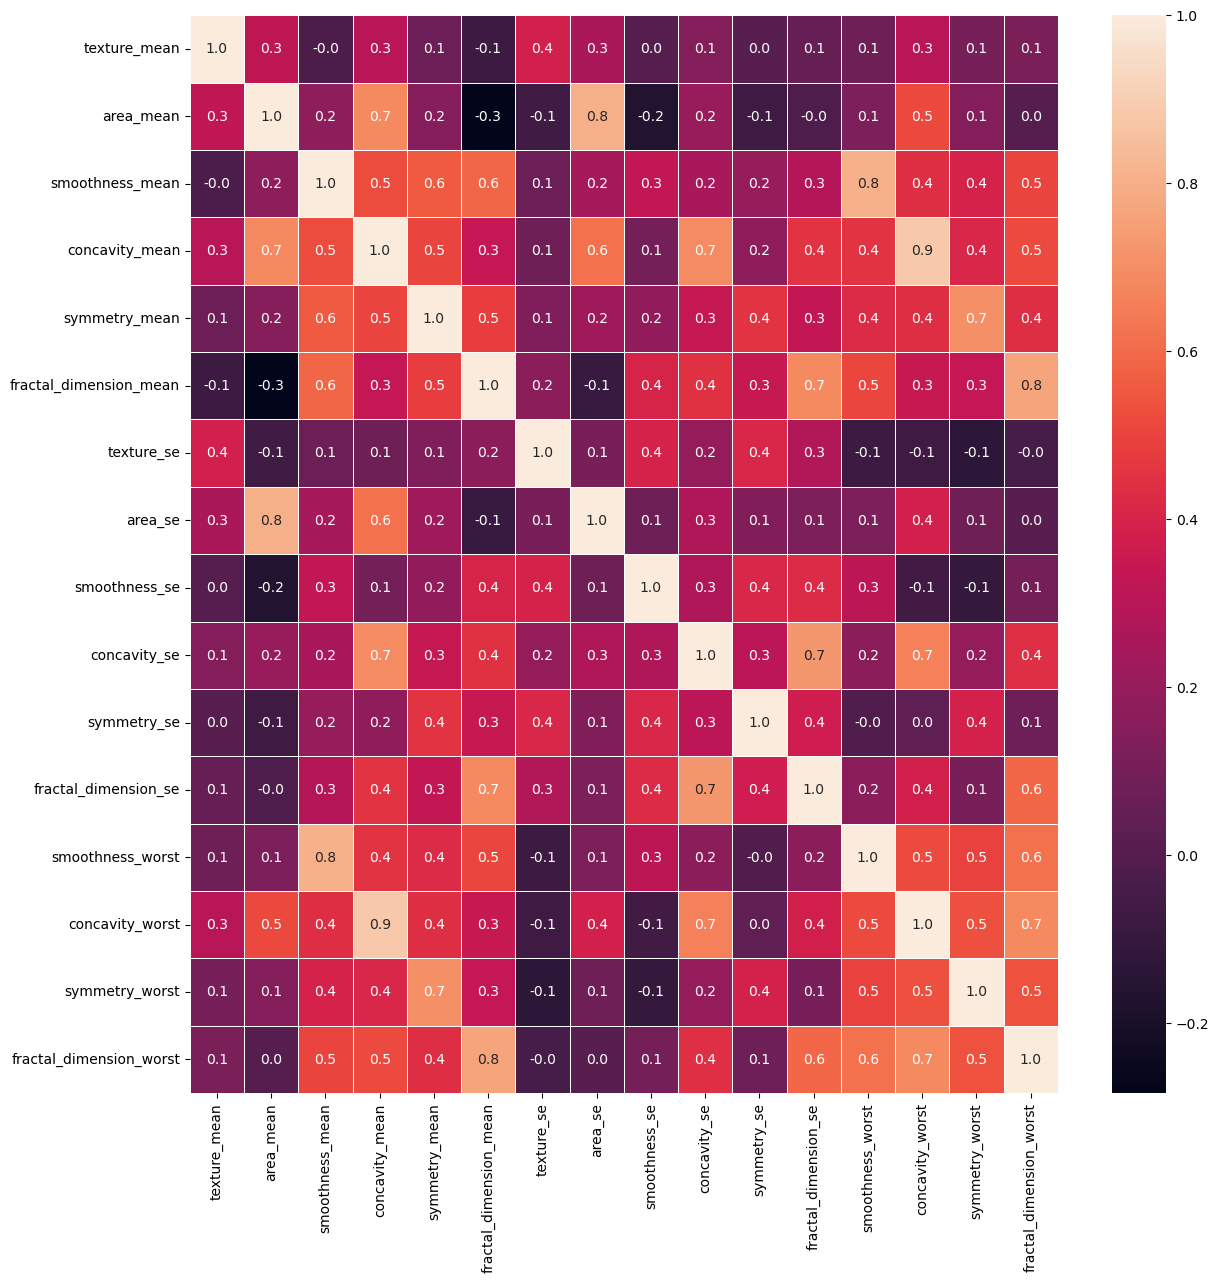

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9649122807017544


<Axes: >

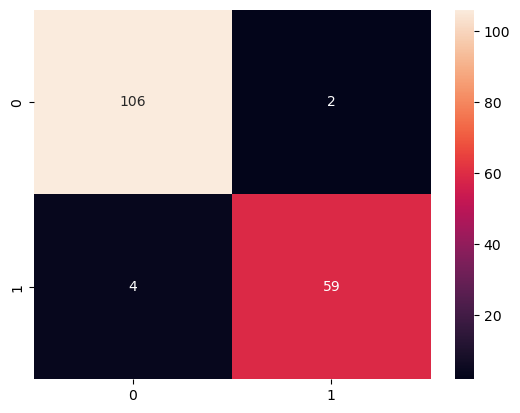

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Didapatkan akurasi 96% seperti terlihat pada confusion matrix. Sekarang kita mencoba metode lain untuk menemukan hasil lebih baik

### 2. Univariate feature selection and random forest classification

Dalam seleksi fitur univariat, kita akan menggunakan SelectKBest yang menghapus semua kecuali fitur-fitur dengan skor tertinggi. Dalam metode ini, kita harus menentukan jumlah fitur yang akan digunakan, dan kita memutuskan untuk menggunakan 5 fitur.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [ ]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9532163742690059


<Axes: >

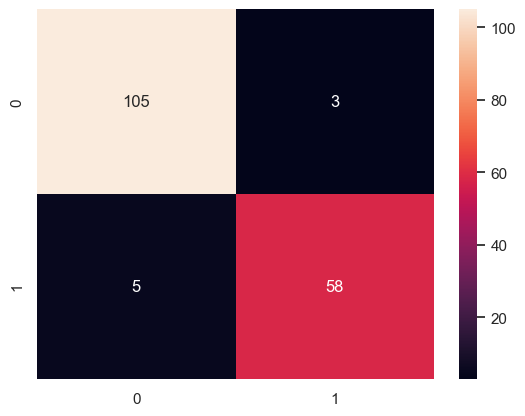

In [ ]:
np.random.seed(42)
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Akurasi  hampir 96% dan seperti yang terlihat pada confusion matrix, kita membuat beberapa prediksi yang salah. Apa yang telah kita lakukan sampai saat ini adalah memilih fitur berdasarkan matriks korelasi dan metode SelectKBest. Meskipun kita menggunakan 5 fitur dalam metode SelectKBest, akurasi terlihat serupa. Sekarang, mari kita lihat metode seleksi fitur lainnya untuk mencari hasil yang lebih baik.

### 3. Recursive Feature Elimination (RFE) dengan random forest

Pada dasarnya, metode ini menggunakan salah satu metode klasifikasi (random forest dalam contoh kita), memberikan bobot pada masing-masing fitur. Fitur dengan bobot absolut terkecil akan dihapus dari set fitur saat ini. Prosedur ini diulangi secara rekursif pada set yang telah dipangkas sampai jumlah fitur yang diinginkan tercapai.

Seperti metode sebelumnya, kita akan menggunakan 5 fitur. Namun, fitur mana saja yang akan kita gunakan? Kita akan memilihnya dengan metode RFE.

In [ ]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [ ]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


Accuracy is:  0.9473684210526315


<Axes: >

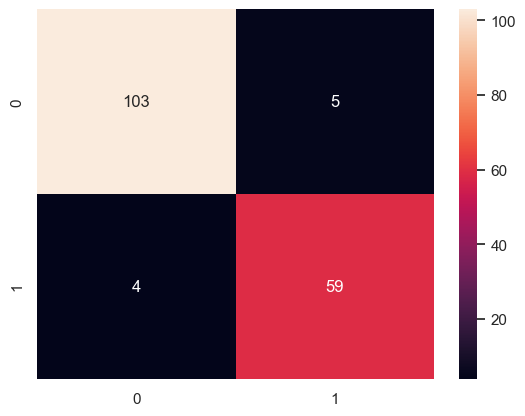

In [ ]:
np.random.seed(42)

# Transform the training and test data using the selected features
x_train_3 = rfe.transform(x_train)
x_test_3 = rfe.transform(x_test)

# Recursive feature elimination with n_estimators=5
clf_rf_3 = RandomForestClassifier(n_estimators=5)
clf_rf_3 = clf_rf_3.fit(x_train_3, y_train)
ac_3 = accuracy_score(y_test, clf_rf_3.predict(x_test_3))
print('Accuracy is: ', ac_3)

# Confusion matrix
cm_3 = confusion_matrix(y_test, clf_rf_3.predict(x_test_3))
sns.heatmap(cm_3, annot=True, fmt="d")

Didapatkan akurasi 93% yang lebih buruk dari metode-metode sebelumnya. Mari mencari tahu apakah ada jumlah fitur lain ynag lebih optimal daripada 5

### 4. Recursive feature elimination with cross validation and random forest classification

Sekarang kita tidak hanya akan menemukan fitur terbaik tetapi juga menentukan berapa banyak fitur yang kita butuhkan untuk mendapatkan akurasi terbaik.

In [ ]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
np.random.seed(42)
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


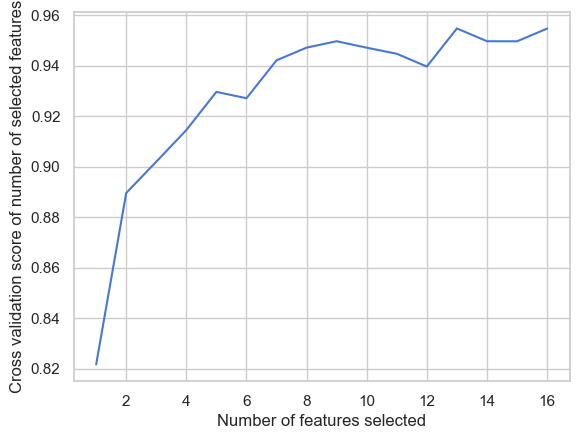

In [ ]:
import matplotlib.pyplot as plt

# Anggaplah rfecv adalah objek RFECV yang sudah di-fit sebelumnya
# Ubah akses grid_scores_ menjadi cv_results_['mean_test_score']
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()


Akhirnya, kita menemukan 14 fitur terbaik yaitu 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'

### 5. Tree based feature selection and random forest classification

Dalam metode klasifikasi random forest, terdapat atribut feature_importances_ yang menunjukkan pentingnya fitur (semakin tinggi, semakin penting fitur tersebut).

Untuk menggunakan metode feature_importances_, dalam data pelatihan tidak boleh ada fitur yang berkorelasi. Random forest memilih secara acak pada setiap iterasi, oleh karena itu urutan daftar pentingnya fitur dapat berubah.

Feature ranking:
1. feature 3 (0.247563)
2. feature 1 (0.186419)
3. feature 13 (0.170690)
4. feature 7 (0.114318)
5. feature 14 (0.040324)
6. feature 0 (0.039835)
7. feature 9 (0.036528)
8. feature 12 (0.031333)
9. feature 11 (0.021055)
10. feature 5 (0.019990)
11. feature 2 (0.018768)
12. feature 15 (0.018688)
13. feature 8 (0.015813)
14. feature 4 (0.013652)
15. feature 10 (0.013594)
16. feature 6 (0.011430)


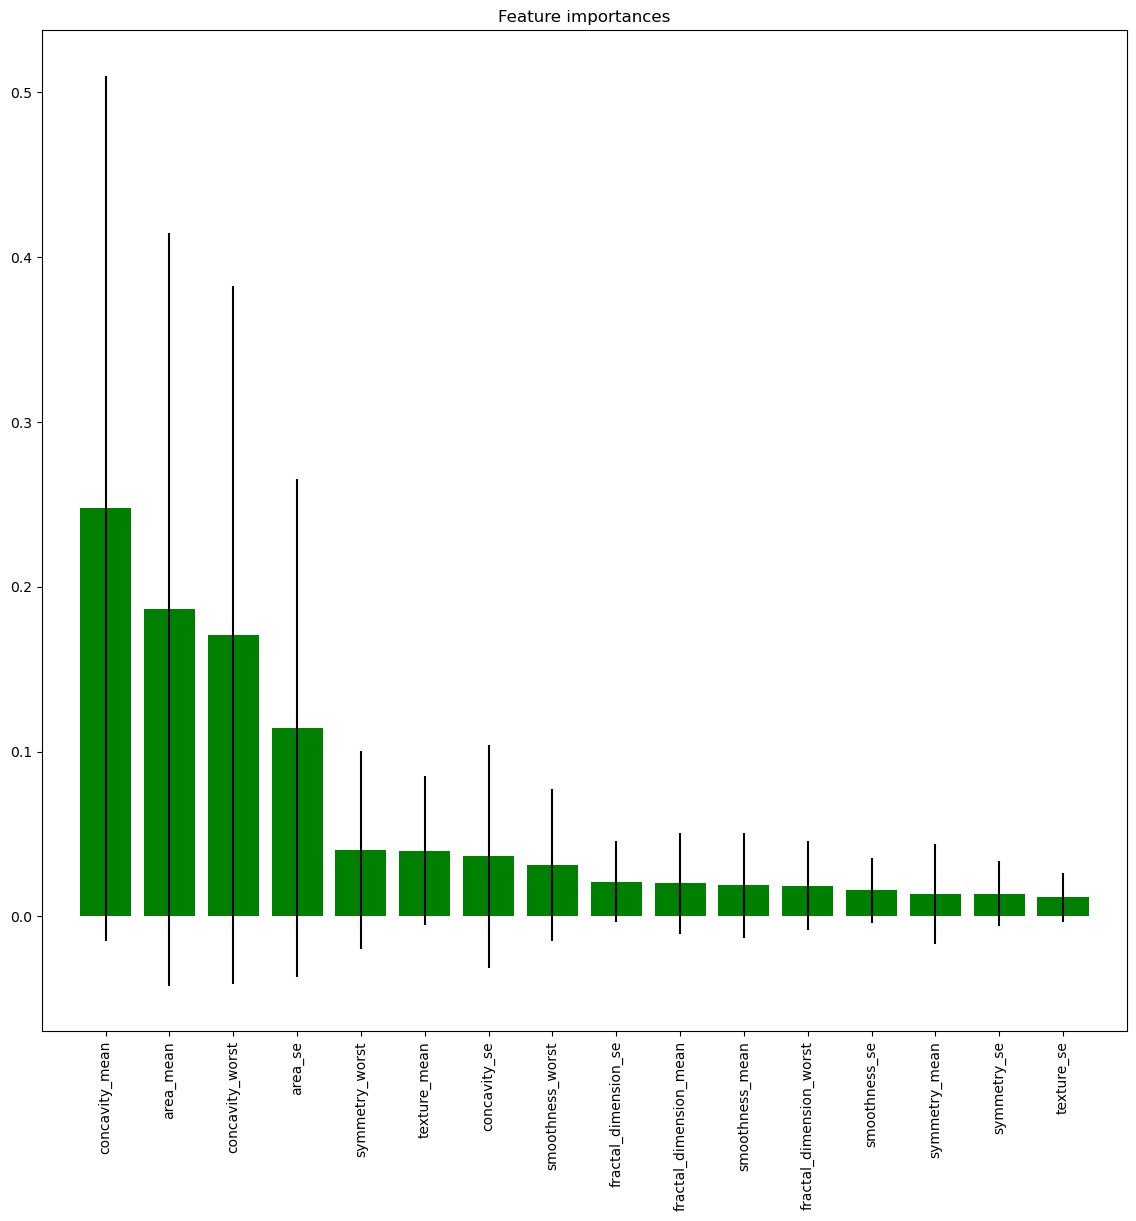

In [ ]:
clf_rf_5 = RandomForestClassifier()
clr_rf_5 = clf_rf_5.fit(x_train, y_train)

# Calculate feature importances
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Check if lengths match
if len(importances) != len(std):
    print("Mismatch in lengths of importances and std. Adjusting...")
    std = np.resize(std, len(importances))

# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the 10 highest feature importances of the forest
np.random.seed(42)
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(len(importances)), x_train.columns[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

Terlihat bahwa 4 fitur terpenting adalah `concave points_mean`, `area_worst`, `perimeter_worst`, `radius_worst`, `concave points_worst`

### 6. Ekstraksi Fitur dengan PCA

Text(0, 0.5, 'explained_variance_ratio_')

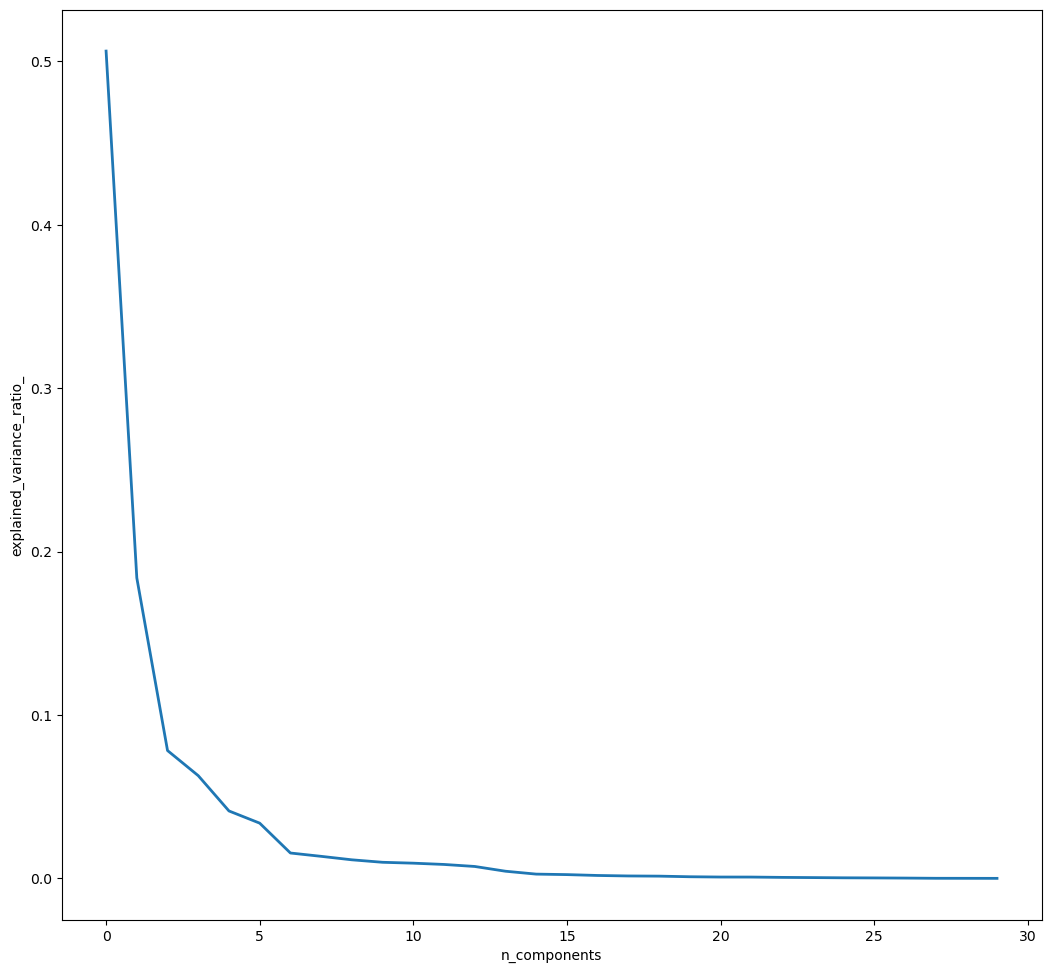

In [ ]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Menurut rasio variasi, 3-4 komponen utama dapat dipilih.

Dipilih 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean' berdasarkan hasil metode selectKbest

## KLASIFIKASI MODEL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
# Encode labels
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [ ]:
# Menggabungkan kembali fitur dan target dalam satu dataframe
df = pd.DataFrame(X)
df['diagnosis'] = y

# Membagi dataset menjadi data pelatihan dan pengujian
traindf, testdf = train_test_split(df, test_size=0.3, random_state=42)


In [ ]:
# Fungsi generik untuk membuat model klasifikasi dan menilai kinerjanya
def classification_model(model, data, predictors, outcome):
    # Fit the model
    model.fit(data[predictors], data[outcome])

    # Make predictions on training set
    predictions = model.predict(data[predictors])

    # Print accuracy
    accuracy = metrics.accuracy_score(data[outcome], predictions)
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))

    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = data[predictors].iloc[train, :]

        # The target we're using to train the algorithm
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target
        model.fit(train_predictors, train_target)

        # Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

    print(metrics.classification_report(data[outcome], predictions))

    # Fit the model again so that it can be referred outside the function
    model.fit(data[predictors], data[outcome])

#### Logistic Regression

In [ ]:
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 90.201%
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       249
           1       0.90      0.83      0.86       149

    accuracy                           0.90       398
   macro avg       0.90      0.89      0.89       398
weighted avg       0.90      0.90      0.90       398



In [ ]:
# Melakukan prediksi pada data tes
test_predictions = model.predict(testdf[predictor_var])

classification_model(model,testdf,predictor_var,outcome_var)

Accuracy: 93.567%
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



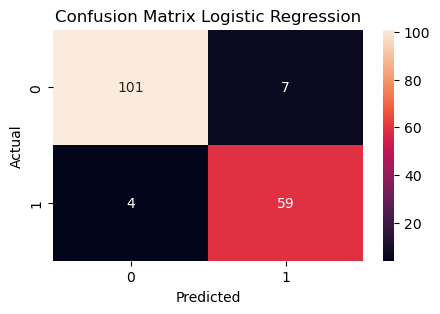

In [ ]:
#Membuat confussion matrix
cm = confusion_matrix(testdf[outcome_var], test_predictions)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

#### Decision Tree

In [ ]:
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
outcome_var='diagnosis'
model=DecisionTreeClassifier(max_depth=5, random_state=42)
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 94.221%
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       249
           1       0.91      0.94      0.92       149

    accuracy                           0.94       398
   macro avg       0.94      0.94      0.94       398
weighted avg       0.94      0.94      0.94       398



In [ ]:
# Melakukan prediksi pada data tes
test_predictions = model.predict(testdf[predictor_var])

classification_model(model,testdf,predictor_var,outcome_var)

Accuracy: 99.415%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



[[108   0]
 [  1  62]]


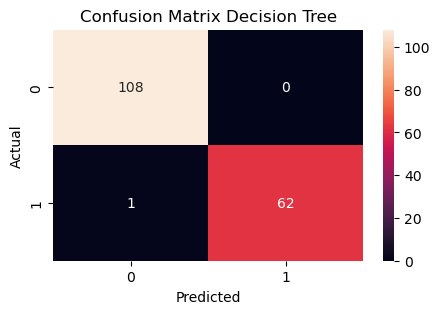

In [ ]:
#Membuat confussion matrix
cm = confusion_matrix(testdf[outcome_var], test_predictions)
print(cm)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

#### Random Forest

In [ ]:
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
outcome_var='diagnosis'
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2, random_state=42)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy: 91.960%
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       249
           1       0.93      0.85      0.89       149

    accuracy                           0.92       398
   macro avg       0.92      0.90      0.91       398
weighted avg       0.92      0.92      0.92       398



In [ ]:
# Melakukan prediksi pada data tes
test_predictions = model.predict(testdf[predictor_var])

classification_model(model,testdf,predictor_var,outcome_var)

Accuracy: 92.982%
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       108
           1       0.96      0.84      0.90        63

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



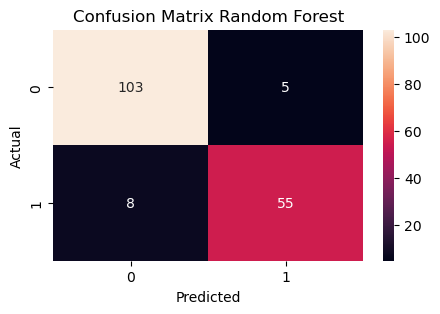

In [ ]:
#Membuat confussion matrix
cm = confusion_matrix(testdf[outcome_var], test_predictions)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

#### KNN

In [ ]:
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
outcome_var='diagnosis'
model=KNeighborsClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 90.452%
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       249
           1       0.92      0.81      0.86       149

    accuracy                           0.90       398
   macro avg       0.91      0.89      0.90       398
weighted avg       0.91      0.90      0.90       398



In [ ]:
# Melakukan prediksi pada data tes
test_predictions = model.predict(testdf[predictor_var])

classification_model(model,testdf,predictor_var,outcome_var)

Accuracy: 93.567%
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       108
           1       0.96      0.86      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



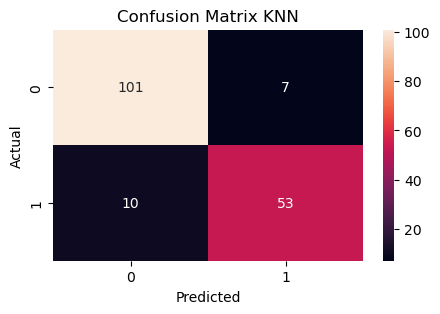

In [ ]:
#Membuat confussion matrix
cm = confusion_matrix(testdf[outcome_var], test_predictions)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()